In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp


In [2]:
df = pd.read_csv("fitness_preprocessed.csv")
df.head()

,age,gender,weight,height,max_bpm,avg_bpm,resting_bpm,session_duration,calories_burned,workout_type,fat_percentage,water_intake,workout_frequency,experience_level,bmi
0,34.0,Female,86.7,1.86,174.0,152.0,74.0,1.12,712.0,strength,12.8,2.4,5.0,2.0,25.060701
1,26.0,Female,84.7,1.83,166.0,156.0,73.0,1.00,833.0,strength,27.9,2.8,5.0,2.0,25.291887
2,22.0,Male,64.8,1.85,187.0,166.0,64.0,1.24,1678.0,cardio,28.7,1.9,3.0,2.0,18.933528
3,54.0,Female,75.3,1.82,187.0,169.0,58.0,1.45,628.0,cardio,31.8,2.4,4.0,1.0,22.732762
4,34.0,Female,52.8,1.74,177.0,169.0,66.0,1.60,1286.0,strength,26.4,3.2,4.0,2.0,17.439556


In [3]:
df.describe().round(1)

,age,weight,height,max_bpm,avg_bpm,resting_bpm,session_duration,calories_burned,fat_percentage,water_intake,workout_frequency,experience_level,bmi
count,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0
mean,36.7,69.2,1.7,180.5,146.0,64.0,1.4,1029.9,23.5,2.7,3.4,1.8,23.2
std,11.3,17.2,0.1,11.5,15.3,7.9,0.4,318.6,6.0,0.7,0.9,0.7,6.7
min,19.0,40.2,1.5,160.0,120.0,50.0,0.5,303.0,10.0,1.5,2.0,1.0,10.5
25%,27.0,56.2,1.6,170.0,133.0,57.0,1.1,797.0,20.4,2.1,3.0,1.0,18.2
50%,35.0,67.4,1.7,182.0,145.0,65.0,1.4,1025.0,24.2,2.8,3.0,2.0,22.2
75%,46.0,80.8,1.8,191.0,160.0,72.0,1.6,1240.5,27.6,3.4,4.0,2.0,27.6
max,59.0,121.6,2.0,199.0,169.0,74.0,2.0,1783.0,35.0,3.7,5.0,3.0,42.2


In [4]:
# Dataset validacija
# - visi ljudi su tezi od nizih?
# - zene su lakse od muskaraca?
# - zene su nize od muskaraca?
# - veci body fat => veci resting_bpm?
# - veci bmi => veci fat_percentage?
# - duzi trening => vise potrosenih kalorija?
mdf = df[df["gender"]=="Male"]
fdf = df[df["gender"]=="Female"]

In [5]:
def corr(x,y):
    return sp.stats.pearsonr(x,y).statistic.round(3) 

Female corr 0.018
Male corr -0.012


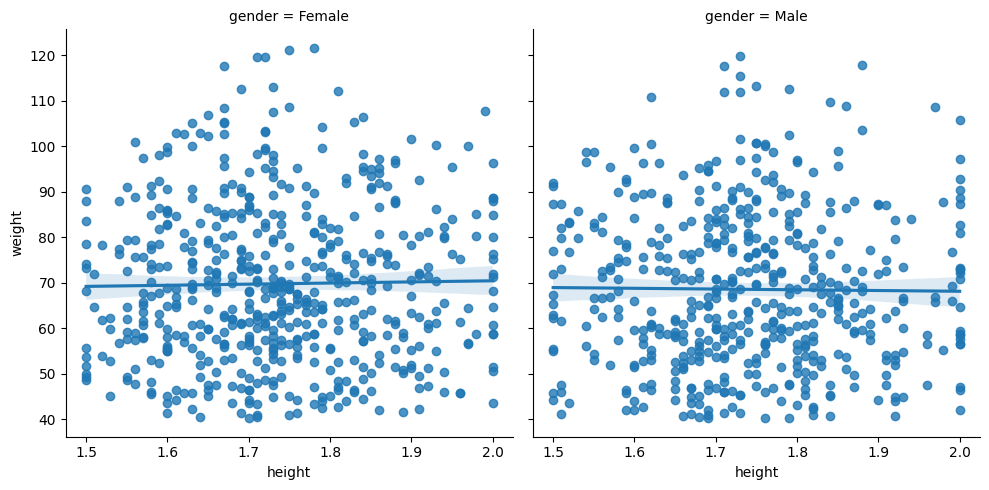

In [6]:
# - visi ljudi su tezi od nizih?
sb.lmplot(data=df, col="gender", x="height", y="weight")
print("Female corr", corr(fdf["height"], fdf["weight"]))
print("Male corr", corr(mdf["height"], mdf["weight"]))

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,554.0,69.750,17.318,40.2,56.7,68.05,81.075,121.6
Male,509.0,68.523,17.151,40.2,55.3,66.60,80.600,119.9


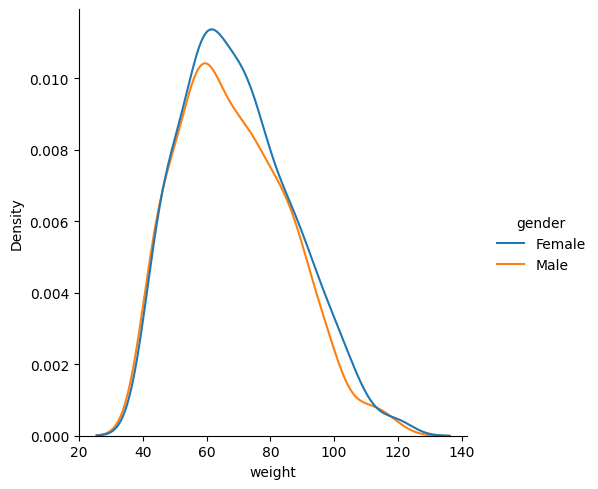

In [7]:
# - zene su lakse od muskaraca?
sb.displot(data=df, x="weight", hue="gender", kind="kde")
df.groupby("gender")["weight"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,554.0,1.736,0.124,1.5,1.65,1.73,1.82,2.0
Male,509.0,1.740,0.124,1.5,1.66,1.73,1.82,2.0


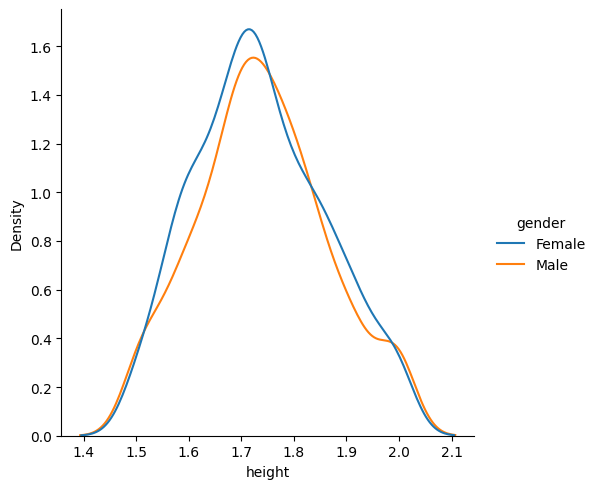

In [8]:
# - zene su nize od muskaraca?
sb.displot(data=df, x="height", hue="gender", kind="kde")
df.groupby("gender")["height"].describe().round(3)

corr -0.094


<Axes: xlabel='fat_percentage', ylabel='resting_bpm'>

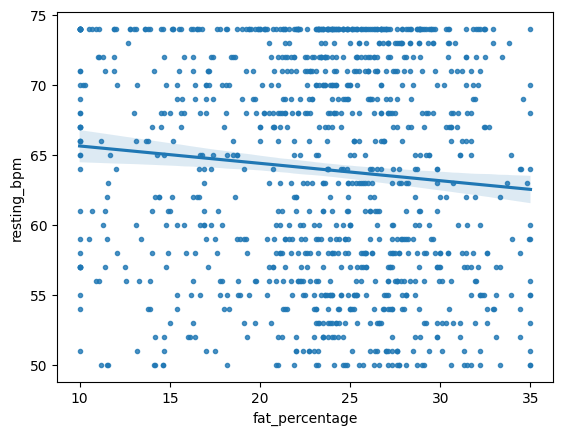

In [9]:
# - veci body fat => veci resting_bpm?
print("corr", corr(df["fat_percentage"], df["resting_bpm"]))
sb.regplot(data=df, x="fat_percentage", y="resting_bpm", marker=".")

corr 0.011


<Axes: xlabel='bmi', ylabel='fat_percentage'>

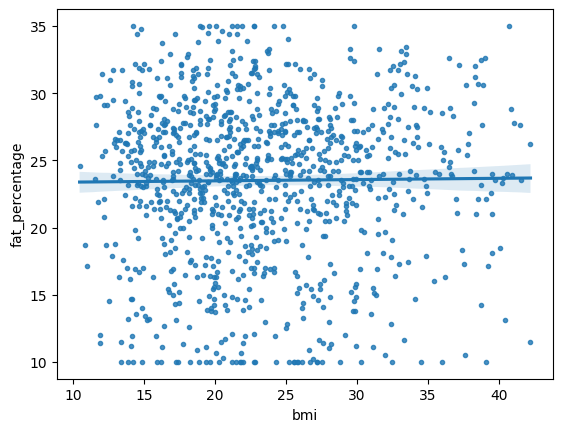

In [10]:
# - veci bmi => veci fat_percentage?
print("corr", corr(df["bmi"], df["fat_percentage"]))
sb.regplot(data=df, x="bmi", y="fat_percentage", marker=".")

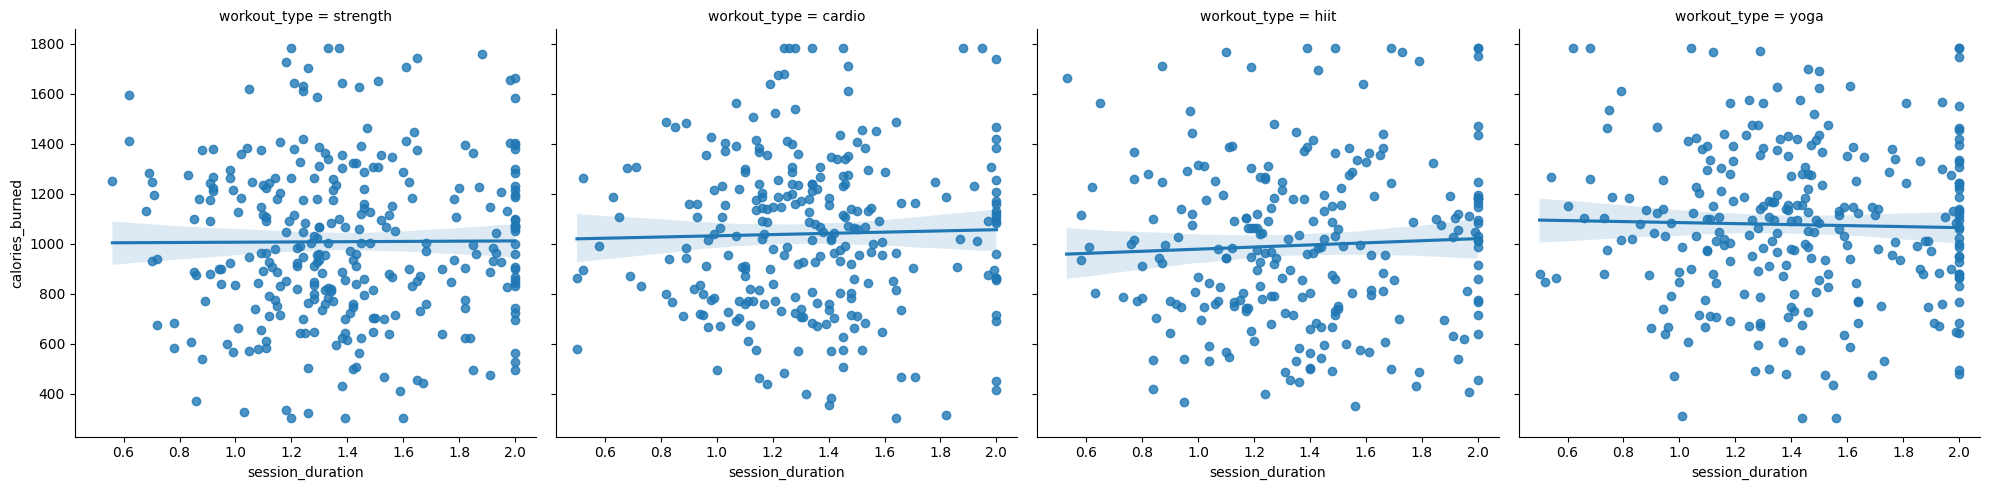

In [11]:
# - duzi trening => vise potrosenih kalorija?
sb.lmplot(data=df, col="workout_type", x="session_duration", y="calories_burned")

corr 0.016


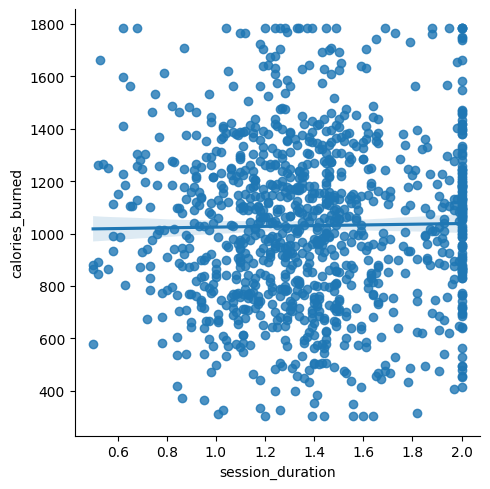

In [12]:
print("corr", corr(df["session_duration"], df["calories_burned"]))
sb.lmplot(data=df, x="session_duration", y="calories_burned")